In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import cv2

# Load data

In [2]:
IMAGE_TEST_DIR = "/kaggle/input/sign-classification/test"
IMAGE_TRAIN_DIR = "/kaggle/input/sign-classification/final_data/final_data"
train_label_file= '/kaggle/input/sign-classification/Train.csv'
test_label_file = '/kaggle/input/sign-classification/Test.csv'
df_train = pd.read_csv(train_label_file)
df_test = pd.read_csv(test_label_file)

In [3]:
print("Number of training images", df_train.shape[0])
print("Number of testing images", df_test.shape[0])

Number of training images 6249
Number of testing images 2679


In [4]:
df_train.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   img_IDS  6249 non-null   object
 1   Label    6249 non-null   object
dtypes: object(2)
memory usage: 97.8+ KB


## check if there's duplicate ID

In [6]:
df_train['img_IDS'].nunique()

6249

In [7]:
print(df_train["Label"].unique())
print(df_train["Label"].nunique())

['Temple' 'Church' 'Enough/Satisfied' 'Me' 'Love' 'Mosque' 'You' 'Friend'
 'Seat']
9


## Number of images in each label

In [8]:
df_train['Label'].value_counts()

Enough/Satisfied    695
Mosque              695
Seat                695
Temple              694
Church              694
Me                  694
Love                694
You                 694
Friend              694
Name: Label, dtype: int64

# let's discover our image dataset

In [9]:
class_name = df_train["Label"].unique()
class_name

array(['Temple', 'Church', 'Enough/Satisfied', 'Me', 'Love', 'Mosque',
       'You', 'Friend', 'Seat'], dtype=object)

In [10]:
# get the list of jpg from sub image class folders
temple_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Temple') if fn.endswith('.jpg')]
church_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Church') if fn.endswith('.jpg')]
enough_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Enough') if fn.endswith('.jpg')]
me_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Me') if fn.endswith('.jpg')]
love_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Love') if fn.endswith('.jpg')]
you_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/You') if fn.endswith('.jpg')]
friend_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Friend') if fn.endswith('.jpg')]
seat_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Seat') if fn.endswith('.jpg')]
mosque_imgs = [fn for fn in os.listdir(f'{IMAGE_TRAIN_DIR}/Mosque') if fn.endswith('.jpg')]


In [11]:
# randomly select 3 of each
select_temple = np.random.choice(temple_imgs, 3, replace = False)
select_church = np.random.choice(church_imgs, 3, replace = False)
select_enough = np.random.choice(enough_imgs, 3, replace = False)
select_me = np.random.choice(me_imgs, 3, replace = False)
select_love = np.random.choice(love_imgs, 3, replace = False)
select_you = np.random.choice(you_imgs, 3, replace = False)
select_friend = np.random.choice(friend_imgs, 3, replace = False)
select_seat = np.random.choice(seat_imgs, 3, replace = False)
select_mosque = np.random.choice(mosque_imgs, 3, replace = False)

In [12]:
def show_image(list_image,label):
    for i in range(3):
        file_name = list_image[i]
        fn = image.load_img(f'{IMAGE_TRAIN_DIR}/'+label+'/'+file_name, target_size = (100,100), color_mode='rgb')
        plt.imshow(fn)
        plt.title(label)
        plt.axis('off')
        plt.show()

### Temple image

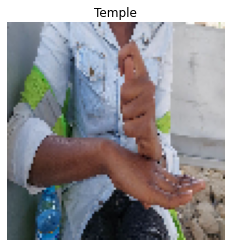

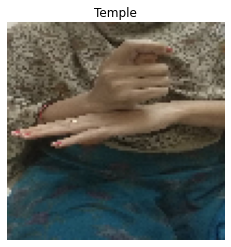

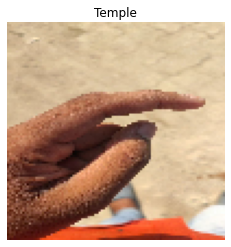

In [13]:
show_image(select_temple,'Temple')

### Church

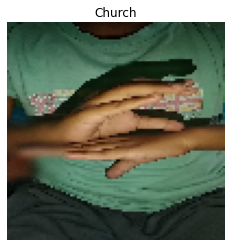

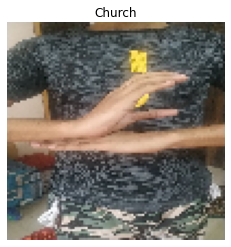

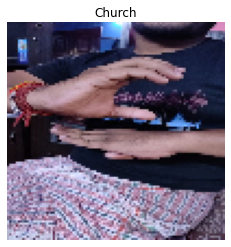

In [14]:
show_image(select_church,'Church')

### Enough

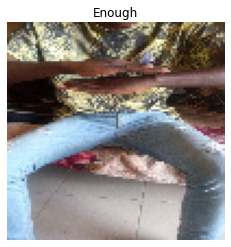

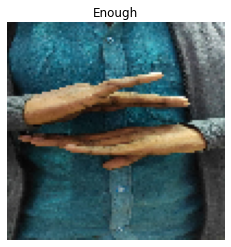

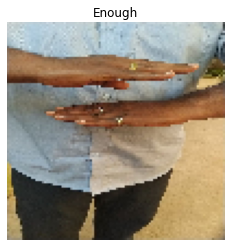

In [15]:
show_image(select_enough,'Enough')

### Me

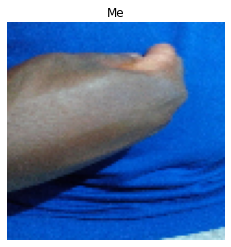

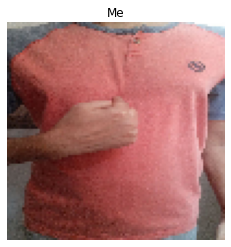

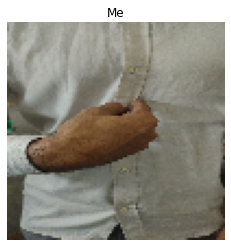

In [16]:
show_image(select_me,'Me')

### Love

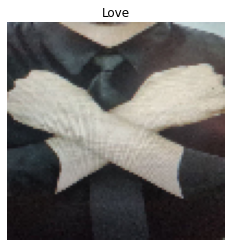

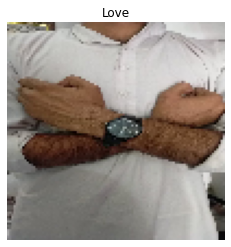

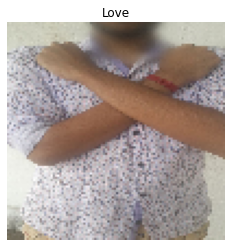

In [17]:
show_image(select_love,'Love')

### You

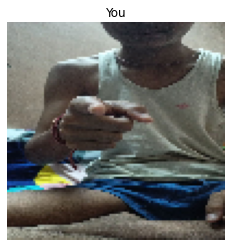

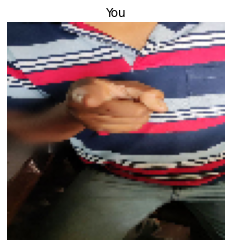

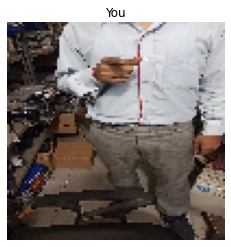

In [18]:
show_image(select_you,'You')

### Friend

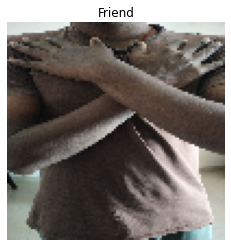

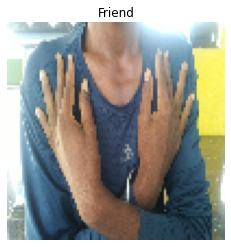

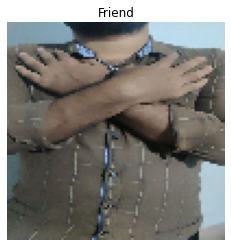

In [19]:
show_image(select_friend,'Friend')

### Seat

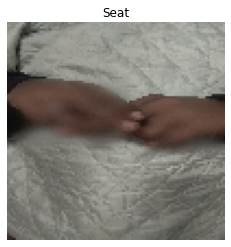

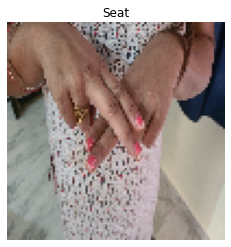

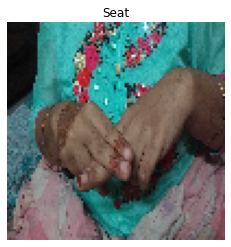

In [20]:
show_image(select_seat,'Seat')

### Mosque

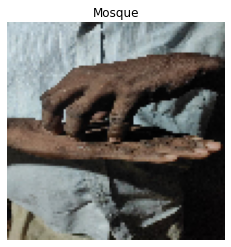

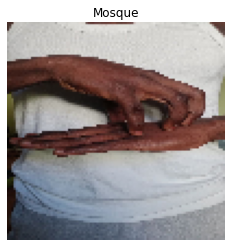

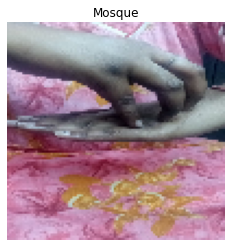

In [21]:
show_image(select_mosque,'Mosque')


Summary Statistics for Image Properties:
             Width       Height  Aspect Ratio
count  6249.000000  6249.000000   6249.000000
mean    836.857097  1163.142903      0.816096
std     227.580055   227.580055      0.493880
min     720.000000   720.000000      0.562500
25%     720.000000  1280.000000      0.562500
50%     720.000000  1280.000000      0.562500
75%     720.000000  1280.000000      0.562500
max    1280.000000  1280.000000      1.777778


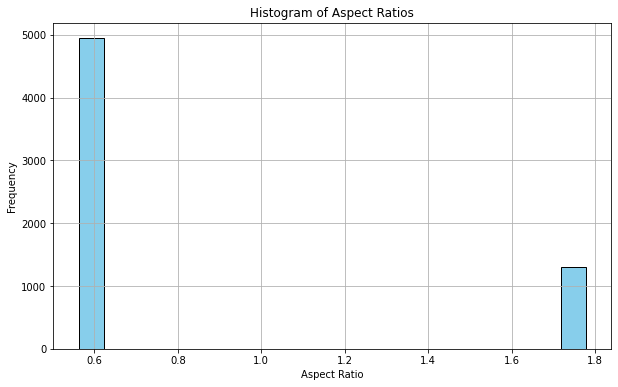

In [22]:
def analyze_image_properties(image_dir, image_list):
    properties = []
    for img_name in image_list:
        img_path = os.path.join(image_dir, img_name)
        img = Image.open(img_path)
        width, height = img.size
        aspect_ratio = width / height
        properties.append({'Image': img_name, 'Width': width, 'Height': height, 'Aspect Ratio': aspect_ratio})
    return pd.DataFrame(properties)

temple_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Temple'), temple_imgs)
church_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Church'), church_imgs)
enough_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Enough'), enough_imgs)
me_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Me'), me_imgs)
love_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Love'), love_imgs)
you_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'You'), you_imgs)
friend_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Friend'), friend_imgs)
seat_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Seat'), seat_imgs)
mosque_df = analyze_image_properties(os.path.join(IMAGE_TRAIN_DIR, 'Mosque'), mosque_imgs)

image_properties_df = pd.concat([temple_df, church_df, enough_df, me_df, love_df, you_df, friend_df, seat_df, mosque_df], ignore_index=True)

print("\nSummary Statistics for Image Properties:")
print(image_properties_df.describe())

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(image_properties_df['Aspect Ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
